# Code to plot CDF of MEH-FEST detection results

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cdf(detections):
    print("size = %d, max = %f, min = %f, mean = %f" % 
          (len(detections), np.max(detections),
           np.min(detections), np.mean(detections)))
    
    index = np.zeros(len(detections))
    results = np.zeros(len(detections))    
    for i, result in enumerate(detections):
        index[i] = i + 1
        results[i] = result
    
    index = index / len(detections)
    results = results * 10000
    
    plt.plot(results, index)
    plt.xlabel(r'Detection scores $\mathrm{x 10^{4}}$', fontsize=12)
    plt.ylabel('CDF', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    plt.show()    
    plt.close()

def preprocess(detections):
    print("size = %d, max = %f, min = %f, mean = %10.8f, std = %10.8f, D = %10.8f" % 
          (len(detections), np.max(detections),
           np.min(detections), np.mean(detections),
           np.std(detections), np.mean(detections)+3*np.std(detections)))
    
    index = np.zeros(len(detections))
    results = np.zeros(len(detections))    
    for i, result in enumerate(detections):
        index[i] = i + 1
        results[i] = result
    
    index = index / len(detections)
    results = results * 10000
    
    return index, results
    
def plot_cdf_original_audio(train_data, test_data,
                            all_data, file_name):
  
    train_index, train_results = preprocess(train_data)
    test_index, test_results = preprocess(test_data)
    all_index, all_results = preprocess(all_data)
        
    plt.plot(train_results, train_index, 'r-', label='Training data')
    plt.plot(test_results, test_index, 'b:', label='Test data')
    plt.plot(all_results, all_index, 'k--', label='All original audios')
    
    plt.xlabel(r'Energy in high frequencies (i.e., $E$) $\mathrm{x 10^{4}}$', fontsize=12)
    plt.ylabel('CDF', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()
    
def plot_cdf_gmm_adv_audio(all_original_detections, 
                           adv_epsilon_0005_detections,
                           adv_epsilon_001_detections,
                           adv_epsilon_002_detections,
                           adv_epsilon_005_detections,
                           file_name):
  
    org_index, org_results = preprocess(all_original_detections)
    adv_0005_index, adv_0005_results = preprocess(adv_epsilon_0005_detections)
    adv_001_index, adv_001_results = preprocess(adv_epsilon_001_detections)
    adv_002_index, adv_002_results = preprocess(adv_epsilon_002_detections)
    adv_005_index, adv_005_results = preprocess(adv_epsilon_005_detections)
          
    plt.plot(org_results, org_index, 'k--', label='All original audios')
    plt.plot(adv_0005_results, adv_0005_index, 'r-', 
             label='FAKEBOB audios ($\epsilon = 0.0005$)')
    plt.plot(adv_001_results, adv_001_index, 'b:', 
             label='FAKEBOB audios ($\epsilon = 0.001$)')
    plt.plot(adv_002_results, adv_002_index, 'g-.', 
             label='FAKEBOB audios ($\epsilon = 0.002$)')
    plt.plot(adv_005_results, adv_005_index, 'c+', 
             label='FAKEBOB audios ($\epsilon = 0.005$)')    
    
    plt.xscale('log')
    plt.xlabel(r'Energy in high frequencies (i.e., $E$) $\mathrm{x 10^{4}}$', fontsize=12)
    plt.ylabel('CDF', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()
    
def plot_cdf_iv_adv_audio(all_original_detections, 
                          iv_adv_epsilon_002_detections,
                          file_name):
  
    org_index, org_results = preprocess(all_original_detections)    
    adv_002_index, adv_002_results = preprocess(iv_adv_epsilon_002_detections)
          
    plt.plot(org_results, org_index, 'k--', label='All original audios')
    plt.plot(adv_002_results, adv_002_index, 'r-', 
             label='FAKEBOB audios ($\epsilon = 0.002$)')
        
    plt.xlabel(r'Energy in high frequencies (i.e., $E$) $\mathrm{x 10^{4}}$', fontsize=12)
    plt.ylabel('CDF', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()
    
def split_train_test(data, test_ratio):
    # the code refers to https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data[train_indices], data[test_indices]


Original audios (both illegal and registered audios):

size = 480, max = 0.000154, min = 0.000000, mean = 0.00004190, std = 0.00003680, D = 0.00015231
size = 120, max = 0.000151, min = 0.000000, mean = 0.00004435, std = 0.00004231, D = 0.00017128
size = 600, max = 0.000154, min = 0.000000, mean = 0.00004239, std = 0.00003798, D = 0.00015633


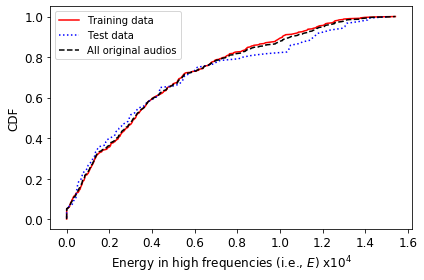

In [2]:
illegal_detections = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.947744e-08, 5.627957e-08, 4.3622896e-07, 4.609854e-06, 5.4028005e-06, 6.322659e-06, 6.645034e-06, 6.9070193e-06, 7.1439363e-06, 7.592919e-06, 7.744055e-06, 8.084191e-06, 8.3131545e-06, 8.474261e-06, 8.4893945e-06, 8.777654e-06, 9.199288e-06, 9.633735e-06, 9.637276e-06, 9.735709e-06, 1.0103414e-05, 1.034101e-05, 1.0386724e-05, 1.0697486e-05, 1.0761717e-05, 1.08683535e-05, 1.2006208e-05, 1.216279e-05, 1.2265409e-05, 1.2796008e-05, 1.3285142e-05, 1.3337004e-05, 1.3708585e-05, 1.3962976e-05, 1.3981971e-05, 1.4051307e-05, 1.4243906e-05, 1.4418476e-05, 1.4572634e-05, 1.5061783e-05, 1.5139913e-05, 1.8345185e-05, 1.8829947e-05, 1.887283e-05, 1.9457171e-05, 2.2885648e-05, 2.2940592e-05, 2.4001354e-05, 2.5939544e-05, 2.6998378e-05, 3.3331427e-05, 3.543854e-05, 3.693652e-05, 3.7523503e-05, 3.7955775e-05, 3.8642076e-05, 3.9417697e-05, 4.004283e-05, 4.00633e-05, 4.07455e-05, 4.1867115e-05, 4.229935e-05, 4.260472e-05, 4.3087566e-05, 4.382095e-05, 4.4600147e-05, 4.5327986e-05, 4.5421493e-05, 4.6715028e-05, 4.6753816e-05, 4.7083082e-05, 4.8734262e-05, 5.1023882e-05, 5.188424e-05, 5.2805262e-05, 5.353906e-05, 5.4466876e-05, 5.5368608e-05]
legal_detections = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1643896e-08, 2.9331314e-08, 7.2489297e-07, 7.3678746e-07, 1.1819685e-06, 1.2583589e-06, 1.4338985e-06, 1.4650258e-06, 1.4780602e-06, 1.5167531e-06, 1.5620587e-06, 1.5720478e-06, 1.7039542e-06, 1.7522227e-06, 1.8661252e-06, 1.8686825e-06, 1.87653e-06, 2.0348841e-06, 2.1791445e-06, 2.300436e-06, 2.3797966e-06, 2.4366864e-06, 2.584926e-06, 2.5948798e-06, 2.6284283e-06, 2.7938277e-06, 2.8334603e-06, 2.955228e-06, 3.0147344e-06, 3.0188837e-06, 3.1373459e-06, 3.1559393e-06, 3.2311962e-06, 3.3002905e-06, 3.5412745e-06, 3.6159133e-06, 3.889386e-06, 4.089573e-06, 4.161549e-06, 4.2350066e-06, 4.2479687e-06, 4.3796263e-06, 4.406296e-06, 4.4603858e-06, 4.4665117e-06, 4.5487827e-06, 4.625016e-06, 4.8840184e-06, 4.997146e-06, 5.00229e-06, 5.0853505e-06, 5.2144524e-06, 5.513284e-06, 5.546267e-06, 5.6889717e-06, 5.7099287e-06, 5.7403386e-06, 5.7749817e-06, 5.8578967e-06, 5.971036e-06, 6.3081065e-06, 6.37848e-06, 6.4780506e-06, 6.48671e-06, 6.583823e-06, 6.793009e-06, 6.8955055e-06, 6.9203434e-06, 6.963403e-06, 6.984835e-06, 7.229253e-06, 7.282935e-06, 7.290406e-06, 7.316089e-06, 7.3201204e-06, 7.3819833e-06, 7.408943e-06, 7.4438726e-06, 7.5392354e-06, 8.052558e-06, 8.179557e-06, 8.212973e-06, 8.452516e-06, 8.459849e-06, 8.461563e-06, 8.494949e-06, 8.551195e-06, 8.681466e-06, 8.846559e-06, 9.73424e-06, 9.82392e-06, 1.0070995e-05, 1.02199965e-05, 1.022154e-05, 1.0469203e-05, 1.0590689e-05, 1.0809613e-05, 1.0879057e-05, 1.0996926e-05, 1.1102683e-05, 1.1128876e-05, 1.1515225e-05, 1.152531e-05, 1.1562205e-05, 1.1596461e-05, 1.1631486e-05, 1.1709651e-05, 1.1929437e-05, 1.2122379e-05, 1.2169133e-05, 1.23575355e-05, 1.243811e-05, 1.254699e-05, 1.2567938e-05, 1.2727478e-05, 1.2799641e-05, 1.2832195e-05, 1.2859124e-05, 1.2902522e-05, 1.3063755e-05, 1.3109229e-05, 1.3294758e-05, 1.3379535e-05, 1.3511041e-05, 1.3612214e-05, 1.3612984e-05, 1.3779004e-05, 1.3823018e-05, 1.459594e-05, 1.4766573e-05, 1.5205261e-05, 1.5512514e-05, 1.5884225e-05, 1.6449863e-05, 1.6520897e-05, 1.6573633e-05, 1.6691569e-05, 1.7168088e-05, 1.7913459e-05, 1.8086432e-05, 1.8304245e-05, 1.8903595e-05, 1.8999152e-05, 1.9170226e-05, 1.9863965e-05, 2.010188e-05, 2.0246476e-05, 2.039011e-05, 2.0491632e-05, 2.0608879e-05, 2.0668456e-05, 2.0734262e-05, 2.0759933e-05, 2.0761836e-05, 2.0897141e-05, 2.172469e-05, 2.1732327e-05, 2.1908014e-05, 2.2154592e-05, 2.2649156e-05, 2.2691582e-05, 2.269607e-05, 2.3011271e-05, 2.321819e-05, 2.3456185e-05, 2.3489187e-05, 2.417893e-05, 2.4199664e-05, 2.4217106e-05, 2.4342487e-05, 2.4350353e-05, 2.4579958e-05, 2.4583389e-05, 2.472908e-05, 2.5063091e-05, 2.506986e-05, 2.5198653e-05, 2.5236084e-05, 2.5362617e-05, 2.5457211e-05, 2.5635394e-05, 2.5677662e-05, 2.5763587e-05, 2.5865258e-05, 2.6118998e-05, 2.6373751e-05, 2.6524234e-05, 2.6893926e-05, 2.7018692e-05, 2.735893e-05, 2.747536e-05, 2.749488e-05, 2.7639391e-05, 2.7772123e-05, 2.7922822e-05, 2.8589737e-05, 2.8745411e-05, 2.8785318e-05, 2.8839951e-05, 2.8845807e-05, 2.8926213e-05, 2.9146951e-05, 2.9288263e-05, 2.9387287e-05, 2.9571089e-05, 2.9632069e-05, 2.9809427e-05, 2.9999279e-05, 3.0156232e-05, 3.0294357e-05, 3.0334068e-05, 3.0496418e-05, 3.0578805e-05, 3.0752843e-05, 3.085258e-05, 3.086481e-05, 3.090346e-05, 3.098482e-05, 3.1041902e-05, 3.1513617e-05, 3.1537653e-05, 3.1621476e-05, 3.1905493e-05, 3.2182747e-05, 3.228636e-05, 3.2405373e-05, 3.2437307e-05, 3.2445896e-05, 3.2547017e-05, 3.2608415e-05, 3.270384e-05, 3.2718075e-05, 3.2790453e-05, 3.3011784e-05, 3.3097782e-05, 3.3139393e-05, 3.352088e-05, 3.392523e-05, 3.4037257e-05, 3.4056146e-05, 3.4223118e-05, 3.4356162e-05, 3.4512814e-05, 3.459492e-05, 3.481091e-05, 3.4859593e-05, 3.5198824e-05, 3.5749264e-05, 3.5820718e-05, 3.6123914e-05, 3.6243622e-05, 3.6452886e-05, 3.65757e-05, 3.6647434e-05, 3.6883426e-05, 3.7086294e-05, 3.7094116e-05, 3.7240596e-05, 3.735645e-05, 3.7458558e-05, 3.7464655e-05, 3.7860646e-05, 3.7874386e-05, 3.8038394e-05, 3.8302514e-05, 3.8478393e-05, 3.9042334e-05, 3.9298422e-05, 3.97591e-05, 3.9944985e-05, 4.0322953e-05, 4.0910254e-05, 4.127766e-05, 4.1984335e-05, 4.200748e-05, 4.291934e-05, 4.337961e-05, 4.351526e-05, 4.3540378e-05, 4.3713146e-05, 4.3782202e-05, 4.3843538e-05, 4.480871e-05, 4.510278e-05, 4.548953e-05, 4.5974484e-05, 4.6613804e-05, 4.7050326e-05, 4.708861e-05, 4.7144644e-05, 4.740454e-05, 4.760045e-05, 4.8342554e-05, 4.8610375e-05, 4.929847e-05, 4.9680828e-05, 4.9749826e-05, 4.9787064e-05, 4.9972612e-05, 5.022813e-05, 5.0508108e-05, 5.184962e-05, 5.2022035e-05, 5.2022446e-05, 5.2029733e-05, 5.229067e-05, 5.2296862e-05, 5.244309e-05, 5.2547846e-05, 5.267153e-05, 5.328508e-05, 5.3643984e-05, 5.376568e-05, 5.3937096e-05, 5.412848e-05, 5.425824e-05, 5.4320626e-05, 5.4607717e-05, 5.4771277e-05, 5.4778313e-05, 5.479471e-05, 5.5090644e-05, 5.5269553e-05, 5.5281464e-05, 5.556965e-05, 5.5958848e-05, 5.7405938e-05, 5.8044523e-05, 5.8452748e-05, 5.8496942e-05, 5.8975605e-05, 5.9970673e-05, 6.0750684e-05, 6.0881815e-05, 6.1010276e-05, 6.127215e-05, 6.194471e-05, 6.19735e-05, 6.204929e-05, 6.280667e-05, 6.394856e-05, 6.398901e-05, 6.401511e-05, 6.412213e-05, 6.44121e-05, 6.443779e-05, 6.466654e-05, 6.587515e-05, 6.627842e-05, 6.647308e-05, 6.652911e-05, 6.71579e-05, 6.717631e-05, 6.7522444e-05, 6.7539266e-05, 6.7862755e-05, 6.7938745e-05, 6.846708e-05, 6.89527e-05, 6.91537e-05, 6.941259e-05, 6.95262e-05, 6.9648006e-05, 7.02849e-05, 7.0314774e-05, 7.171338e-05, 7.177323e-05, 7.192388e-05, 7.2605464e-05, 7.277608e-05, 7.331917e-05, 7.442165e-05, 7.458561e-05, 7.483442e-05, 7.502584e-05, 7.541615e-05, 7.607725e-05, 7.622976e-05, 7.62717e-05, 7.646753e-05, 7.828942e-05, 7.834214e-05, 7.858634e-05, 7.929419e-05, 8.058764e-05, 8.1614584e-05, 8.212735e-05, 8.2349216e-05, 8.273565e-05, 8.296745e-05, 8.367025e-05, 8.383463e-05, 8.4013926e-05, 8.434482e-05, 8.4346044e-05, 8.469862e-05, 8.481214e-05, 8.594138e-05, 8.635015e-05, 8.657014e-05, 8.685709e-05, 8.7533066e-05, 8.779479e-05, 8.977702e-05, 9.028374e-05, 9.049816e-05, 9.245814e-05, 9.2899514e-05, 9.3330076e-05, 9.337206e-05, 9.489018e-05, 9.653558e-05, 9.785359e-05, 9.792418e-05, 9.814981e-05, 9.852487e-05, 9.8865305e-05, 9.915937e-05, 9.952642e-05, 9.96563e-05, 0.00010008784, 0.00010068919, 0.00010121421, 0.00010124232, 0.000101247315, 0.000101577316, 0.0001019177, 0.00010246733, 0.00010265926, 0.00010317229, 0.00010404271, 0.000104344246, 0.000104840066, 0.00010494912, 0.000105403284, 0.00010635112, 0.000107107364, 0.000108058106, 0.000108529384, 0.000108619686, 0.00010901316, 0.00011042301, 0.000110675, 0.0001109715, 0.00011147809, 0.000112297515, 0.00011279069, 0.00011308316, 0.00011311256, 0.00011419544, 0.00011501378, 0.000115375304, 0.00011549777, 0.0001160137, 0.000116511175, 0.000116843454, 0.000117081705, 0.000117175776, 0.0001175202, 0.00011760337, 0.000118220676, 0.000118426506, 0.00012027377, 0.00012063898, 0.000120934346, 0.00012106176, 0.000121210025, 0.00012145933, 0.00012231928, 0.00012363464, 0.00012424444, 0.00012492362, 0.00012557645, 0.0001255767, 0.00012557993, 0.00012604221, 0.00012720356, 0.00012772689, 0.00012905324, 0.00012970337, 0.00012991179, 0.00013044872, 0.00013085164, 0.00013133942, 0.00013257274, 0.0001369124, 0.00013807307, 0.00013807816, 0.0001398967, 0.00014115215, 0.00014159144, 0.0001447473, 0.00015114264, 0.00015418202]

all_ori_detections = np.concatenate((illegal_detections, legal_detections))
all_ori_detections.sort()

np.random.seed(42)
train_data, test_data = split_train_test(all_ori_detections, 0.2)
train_data.sort()
test_data.sort()

plot_cdf_original_audio(train_data, 
                        test_data,
                        all_ori_detections,
                        './figs/detection_original_audios.png')

Adversarial audios in GMM SV systems:

size = 600, max = 0.000154, min = 0.000000, mean = 0.00004239, std = 0.00003798, D = 0.00015633
size = 468, max = 0.000798, min = 0.000148, mean = 0.00035303, std = 0.00012156, D = 0.00071771
size = 468, max = 0.002880, min = 0.000559, mean = 0.00141007, std = 0.00044005, D = 0.00273023
size = 468, max = 0.009808, min = 0.001647, mean = 0.00526068, std = 0.00149025, D = 0.00973144
size = 468, max = 0.049656, min = 0.001799, mean = 0.02804608, std = 0.00725807, D = 0.04982030


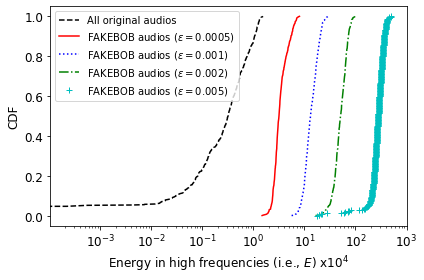

In [6]:
adv_epsilon_0005_detections = [0.00014785379, 0.00015569801, 0.00016747427, 0.00018009353, 0.00018482453, 0.00018961787, 0.00019421514, 0.00019531026, 0.00019558876, 0.0002000989, 0.00020103187, 0.0002014437, 0.00020269217, 0.0002027486, 0.00020520805, 0.00021638082, 0.00021655802, 0.00021698182, 0.00021770076, 0.0002183633, 0.00021950158, 0.0002211586, 0.00022168944, 0.00022375984, 0.00022409525, 0.00022427597, 0.00022664013, 0.00022710935, 0.00022794938, 0.00022930228, 0.00023168504, 0.00023177777, 0.00023216108, 0.0002328038, 0.0002341354, 0.00023442914, 0.00023464776, 0.00023484844, 0.00023568874, 0.00023601775, 0.00023611402, 0.00023663054, 0.00023672832, 0.00023737518, 0.00023781802, 0.00023816932, 0.00023896621, 0.00023962394, 0.00023962941, 0.00023982607, 0.00024035163, 0.00024065946, 0.00024085028, 0.00024104182, 0.00024147754, 0.00024152303, 0.00024195717, 0.00024237426, 0.00024239691, 0.00024273018, 0.00024279479, 0.00024289066, 0.00024391041, 0.00024484974, 0.00024501453, 0.0002450218, 0.0002461437, 0.00024636675, 0.0002475092, 0.00024930088, 0.000250554, 0.00025141018, 0.00025180387, 0.00025211147, 0.00025273467, 0.0002528109, 0.000253327, 0.0002533349, 0.0002539401, 0.0002544269, 0.00025508142, 0.00025579878, 0.00025603082, 0.0002573449, 0.00025824565, 0.00025839094, 0.00025854536, 0.00025883518, 0.00025959543, 0.0002601912, 0.00026037707, 0.00026054404, 0.00026056284, 0.00026108167, 0.0002619802, 0.00026209626, 0.00026293084, 0.00026312465, 0.0002631717, 0.00026320867, 0.0002634223, 0.00026364168, 0.0002636834, 0.00026443257, 0.00026502064, 0.0002654965, 0.00026561762, 0.0002657688, 0.00026637374, 0.00026642514, 0.00026667505, 0.00026792614, 0.0002686337, 0.000268688, 0.00026918275, 0.00026948232, 0.0002695438, 0.0002713088, 0.00027168365, 0.00027286753, 0.0002729991, 0.00027307036, 0.00027378873, 0.00027417077, 0.00027532058, 0.00027543306, 0.00027574395, 0.00027574546, 0.00027594093, 0.00027627093, 0.00027629483, 0.00027644244, 0.00027658168, 0.0002770151, 0.00027703342, 0.00027730397, 0.00027745156, 0.00027761154, 0.000277829, 0.00027838748, 0.00027859234, 0.00027909395, 0.00027983173, 0.00027983842, 0.00027985984, 0.00028011514, 0.0002803054, 0.0002804364, 0.00028094085, 0.0002818216, 0.0002825414, 0.00028258402, 0.00028304933, 0.0002838331, 0.00028395772, 0.00028429052, 0.0002850303, 0.00028614394, 0.00028614566, 0.00028622485, 0.0002863029, 0.0002869064, 0.0002869487, 0.00028701153, 0.00028763412, 0.00028798683, 0.0002880159, 0.0002880202, 0.00028864847, 0.0002893349, 0.00028944446, 0.00028948998, 0.0002899657, 0.00029021245, 0.00029021266, 0.0002906642, 0.00029081505, 0.00029130193, 0.0002913048, 0.00029132955, 0.00029147745, 0.00029181154, 0.0002923991, 0.0002926713, 0.00029380032, 0.00029386426, 0.00029459872, 0.00029521598, 0.0002954295, 0.00029560496, 0.00029563942, 0.0002957067, 0.00029609492, 0.00029664038, 0.00029717706, 0.00029780605, 0.00029803926, 0.00029839124, 0.00029855288, 0.00029938694, 0.00030015243, 0.0003003892, 0.00030080328, 0.0003010999, 0.00030118704, 0.00030217087, 0.00030217483, 0.00030271264, 0.00030357894, 0.000304023, 0.00030447828, 0.0003045111, 0.00030452036, 0.00030461734, 0.00030461897, 0.00030474397, 0.00030536362, 0.0003062229, 0.0003068884, 0.00030713712, 0.0003073105, 0.000307933, 0.00030855596, 0.000309365, 0.00031031983, 0.00031063685, 0.00031079378, 0.0003132221, 0.0003139224, 0.00031451017, 0.00031482952, 0.00031492606, 0.00031530278, 0.00031642354, 0.00031692977, 0.00031722995, 0.00031759747, 0.00031767372, 0.00031901148, 0.00031934737, 0.00031960738, 0.00032004484, 0.00032011577, 0.00032041885, 0.00032138982, 0.000321775, 0.00032189864, 0.00032196834, 0.00032206994, 0.0003230613, 0.00032379723, 0.00032397627, 0.00032454598, 0.00032493687, 0.00032637548, 0.00032679993, 0.0003268747, 0.0003269184, 0.0003274115, 0.00032866458, 0.0003287808, 0.00032885376, 0.00032943167, 0.00032946118, 0.00032973767, 0.0003303217, 0.00033061352, 0.00033063436, 0.0003307721, 0.00033088287, 0.0003313975, 0.00033244776, 0.00033251476, 0.00033252043, 0.00033304509, 0.00033373677, 0.00033429227, 0.00033439597, 0.00033481012, 0.00033571245, 0.00033604496, 0.0003370064, 0.00033718927, 0.00033791692, 0.0003379653, 0.0003390425, 0.00033956397, 0.00034015387, 0.00034029406, 0.00034083516, 0.00034160173, 0.00034272796, 0.0003443935, 0.0003448358, 0.0003467155, 0.00034681044, 0.00034735003, 0.00034900467, 0.00034985933, 0.00035035505, 0.00035073748, 0.0003516461, 0.00035199028, 0.0003526544, 0.0003528633, 0.00035309614, 0.0003539703, 0.00035535987, 0.00035559305, 0.000355804, 0.0003561011, 0.00035641267, 0.00035797973, 0.0003584826, 0.00035879156, 0.00035908032, 0.0003594102, 0.00035999727, 0.0003620161, 0.00036208148, 0.00036376392, 0.00036413505, 0.00036462685, 0.00036484617, 0.000364922, 0.00036638812, 0.00036908983, 0.00037088044, 0.00037156753, 0.00037556497, 0.0003769843, 0.0003770422, 0.0003786776, 0.00037871997, 0.00038055537, 0.00038079085, 0.0003819345, 0.00038259846, 0.00038343453, 0.0003836985, 0.00038829833, 0.00038930442, 0.00039091206, 0.00039452247, 0.00039456712, 0.00039513942, 0.0003951734, 0.0003953989, 0.00040060128, 0.00040094732, 0.00040199904, 0.00040287265, 0.00040554706, 0.00040581895, 0.00040779327, 0.0004085154, 0.00040929165, 0.00041111244, 0.00041438427, 0.00041499143, 0.0004152189, 0.00041632124, 0.00042042823, 0.00042043053, 0.00042132474, 0.0004235855, 0.00042628983, 0.00042840815, 0.00043072173, 0.0004308577, 0.0004314489, 0.0004333101, 0.00043389952, 0.00043671703, 0.00043741585, 0.0004408848, 0.00044517772, 0.00044717285, 0.0004477991, 0.00044791616, 0.0004505065, 0.00045558176, 0.0004566382, 0.00046281802, 0.00046414032, 0.00046615343, 0.00046647122, 0.00047145202, 0.00047230336, 0.00047268582, 0.00047318375, 0.0004734916, 0.00047542184, 0.00047580217, 0.0004775955, 0.0004830968, 0.00048325557, 0.00048511187, 0.0004930532, 0.00049569126, 0.00049684796, 0.00049815775, 0.0004982401, 0.0005007109, 0.00050262845, 0.00050415733, 0.0005072999, 0.00050885725, 0.00051038136, 0.000516539, 0.0005180732, 0.0005252085, 0.00053026015, 0.0005305642, 0.0005334222, 0.000533588, 0.0005377339, 0.0005400299, 0.0005421144, 0.0005436849, 0.0005460448, 0.00054640503, 0.00054837787, 0.00056010194, 0.00056458835, 0.00056512834, 0.00056553615, 0.00056587555, 0.00057154236, 0.0005717703, 0.00057192304, 0.000578044, 0.000584839, 0.0005853096, 0.0005857887, 0.0005858689, 0.0005876085, 0.00058958726, 0.00059109885, 0.0005993818, 0.0006019022, 0.00060398557, 0.00060799974, 0.0006126581, 0.00061482075, 0.00061536505, 0.00062504906, 0.0006274472, 0.0006280419, 0.00063991046, 0.0006424943, 0.0006532502, 0.000655164, 0.00065823994, 0.0006593635, 0.00065981917, 0.0006766066, 0.0006843916, 0.00069159834, 0.00069436524, 0.00069696864, 0.0007017921, 0.0007024661, 0.0007069692, 0.00072002766, 0.0007455015, 0.00075572694, 0.0007981599]
adv_epsilon_001_detections = [0.00055920373, 0.0006471082, 0.0006581923, 0.00066739897, 0.0006902232, 0.0007022148, 0.0007308384, 0.00074168836, 0.0007455397, 0.0007503478, 0.00075582, 0.00075956935, 0.0007730256, 0.0007730374, 0.00077623874, 0.0007790415, 0.00078354735, 0.0007910241, 0.0007938468, 0.0008131657, 0.00081560324, 0.00081595074, 0.00082968123, 0.00083063566, 0.0008343484, 0.0008445614, 0.00084568094, 0.0008516229, 0.0008518176, 0.0008539678, 0.00085584546, 0.0008573027, 0.00085974374, 0.0008635971, 0.0008688362, 0.00087320287, 0.0008734985, 0.0008812258, 0.00088326994, 0.00088890624, 0.00089252216, 0.0008985892, 0.00090164365, 0.00090566557, 0.00090580806, 0.0009083416, 0.00091404235, 0.0009169836, 0.0009208136, 0.000923138, 0.0009257061, 0.0009264451, 0.0009301229, 0.0009378189, 0.0009398153, 0.00094277743, 0.00095001573, 0.0009541564, 0.00095521816, 0.0009580861, 0.0009604763, 0.0009643052, 0.000965355, 0.0009692722, 0.0009709232, 0.00097407994, 0.0009804697, 0.0009812345, 0.0009843284, 0.0009851822, 0.0009869733, 0.0009915192, 0.0009951043, 0.0009966214, 0.0009968333, 0.0009982322, 0.0009988112, 0.0010021632, 0.0010026947, 0.001002908, 0.0010029597, 0.0010043795, 0.0010051572, 0.0010076069, 0.0010077908, 0.0010092569, 0.0010115217, 0.0010126531, 0.0010156218, 0.0010164899, 0.0010189422, 0.0010215052, 0.0010230788, 0.0010246786, 0.0010258504, 0.0010261281, 0.0010278616, 0.0010295184, 0.001030564, 0.0010329025, 0.0010380978, 0.0010394895, 0.0010421125, 0.0010426362, 0.0010430854, 0.0010443766, 0.0010497837, 0.0010509567, 0.0010537547, 0.0010561843, 0.0010577226, 0.0010585128, 0.0010598483, 0.00106359, 0.0010694736, 0.001069922, 0.0010732005, 0.0010766222, 0.0010769645, 0.0010769761, 0.001078747, 0.0010809827, 0.0010831406, 0.001085712, 0.0010871161, 0.0010877465, 0.0010892231, 0.0010899651, 0.00109052, 0.001091975, 0.001093551, 0.0010937483, 0.0010941805, 0.0010952535, 0.0010957884, 0.0010963227, 0.0010972033, 0.0010991747, 0.0011022524, 0.001105038, 0.0011064967, 0.0011099497, 0.001111683, 0.0011145369, 0.0011161851, 0.0011169008, 0.0011271107, 0.0011312317, 0.0011323062, 0.001133206, 0.0011339791, 0.0011350974, 0.0011383517, 0.0011386522, 0.0011396711, 0.0011408305, 0.0011434659, 0.0011447223, 0.0011470842, 0.0011509967, 0.0011519251, 0.0011524952, 0.00115409, 0.0011550984, 0.001155439, 0.0011568086, 0.0011569546, 0.0011575143, 0.0011610655, 0.0011616527, 0.0011632231, 0.0011715333, 0.0011724383, 0.0011762602, 0.0011773647, 0.0011804083, 0.0011821875, 0.0011837005, 0.0011852476, 0.0011887808, 0.0011912222, 0.0011912977, 0.0011941391, 0.0011964854, 0.001198152, 0.0012011379, 0.0012020597, 0.0012047878, 0.0012049444, 0.0012064613, 0.0012075881, 0.0012080376, 0.0012134019, 0.0012142579, 0.0012152913, 0.0012161586, 0.0012175093, 0.0012213842, 0.0012252945, 0.0012283107, 0.001232504, 0.0012354048, 0.0012367314, 0.001238046, 0.0012399815, 0.001247063, 0.0012478869, 0.0012515996, 0.0012532086, 0.0012538104, 0.0012553321, 0.001255339, 0.0012556757, 0.0012571246, 0.0012585595, 0.0012588042, 0.0012652639, 0.0012657316, 0.001268057, 0.0012715668, 0.0012728232, 0.0012747443, 0.0012750378, 0.001275071, 0.0012787494, 0.0012906917, 0.0012960363, 0.0012968073, 0.0012987567, 0.0013043836, 0.0013051376, 0.0013067051, 0.0013092445, 0.0013092457, 0.0013135228, 0.0013144548, 0.0013146226, 0.0013184611, 0.0013237878, 0.0013271568, 0.0013300729, 0.001332907, 0.0013344174, 0.0013403676, 0.0013433173, 0.0013442388, 0.0013452028, 0.0013519841, 0.0013522927, 0.0013543569, 0.001356666, 0.0013632776, 0.001370675, 0.0013714456, 0.0013715178, 0.0013716766, 0.0013720192, 0.0013772526, 0.0013827969, 0.0013863754, 0.0014011484, 0.001401983, 0.0014049938, 0.0014133276, 0.0014138453, 0.0014180059, 0.0014245672, 0.0014246253, 0.0014265728, 0.0014325633, 0.0014329255, 0.0014364514, 0.0014377744, 0.0014454648, 0.0014472628, 0.0014489264, 0.0014542532, 0.0014568866, 0.0014574068, 0.001458764, 0.0014646101, 0.0014711162, 0.001477412, 0.0014884856, 0.0014891998, 0.0014917167, 0.0014923122, 0.0014935767, 0.0014958374, 0.001497666, 0.0014977582, 0.0014998096, 0.0015045373, 0.0015077877, 0.0015142055, 0.0015174483, 0.0015184184, 0.0015211556, 0.0015358132, 0.0015363802, 0.0015397087, 0.0015411436, 0.0015434063, 0.0015441453, 0.001545154, 0.0015488229, 0.0015493474, 0.0015501301, 0.0015515606, 0.0015541757, 0.0015588272, 0.0015603692, 0.0015647323, 0.0015674381, 0.0015687891, 0.0015770468, 0.0015812917, 0.0015904219, 0.0015975623, 0.0016018619, 0.0016075821, 0.0016121975, 0.0016122151, 0.0016149384, 0.0016180585, 0.0016189631, 0.001633283, 0.0016336855, 0.0016376267, 0.0016413037, 0.0016429555, 0.0016477283, 0.0016509651, 0.0016570895, 0.0016572363, 0.0016583818, 0.0016598054, 0.0016618468, 0.0016640148, 0.0016693979, 0.0016696238, 0.0016706707, 0.0016712336, 0.0016785751, 0.0016795568, 0.0016830703, 0.0016831266, 0.001684602, 0.0016849265, 0.0016856268, 0.0016908628, 0.0016939314, 0.0016964655, 0.0016973396, 0.0017006288, 0.0017041609, 0.0017154629, 0.0017173396, 0.0017266329, 0.0017287856, 0.0017407633, 0.001743689, 0.001746031, 0.0017576759, 0.0017580854, 0.0017626587, 0.0017658578, 0.0017708283, 0.0017711484, 0.0017722204, 0.0017728977, 0.001776526, 0.0017843933, 0.001787981, 0.0017904532, 0.0017930145, 0.0018054353, 0.0018075778, 0.0018118834, 0.0018160191, 0.0018212926, 0.0018226623, 0.0018281625, 0.0018390082, 0.0018394747, 0.0018396926, 0.0018472397, 0.0018517391, 0.001859169, 0.0018655362, 0.0018663881, 0.0018780155, 0.0018823693, 0.0018855876, 0.0018875728, 0.0018935397, 0.0019025973, 0.0019154801, 0.0019170055, 0.001919931, 0.0019207963, 0.0019392711, 0.0019413104, 0.0019415237, 0.0019427863, 0.0019520579, 0.0019525727, 0.001954919, 0.0019707873, 0.0019824177, 0.0019850868, 0.001985643, 0.0019862675, 0.0019938655, 0.0020005575, 0.0020143802, 0.002015901, 0.0020185143, 0.0020239123, 0.00203942, 0.0020444482, 0.00204827, 0.00204863, 0.0020555663, 0.0020654714, 0.002067025, 0.0020738242, 0.002101653, 0.0021021895, 0.0021137432, 0.0021169558, 0.0021194646, 0.0021238325, 0.0021240772, 0.0021408566, 0.0021606856, 0.0021707623, 0.00217187, 0.002183462, 0.002185896, 0.002190375, 0.0021920064, 0.002201574, 0.0022030827, 0.0022108834, 0.0022156893, 0.002221188, 0.0022348526, 0.002242303, 0.0022475882, 0.0022569078, 0.0022593443, 0.0022677616, 0.00227389, 0.0023145846, 0.0023234135, 0.0023432716, 0.002361793, 0.0024577498, 0.0024912541, 0.0025103607, 0.0025665455, 0.002631733, 0.0026967737, 0.002701594, 0.002722059, 0.0028225018, 0.002879845]
adv_epsilon_002_detections = [0.0016470819, 0.002062825, 0.0021058796, 0.0021154897, 0.0021648107, 0.0022364242, 0.0022706236, 0.0024236685, 0.0024672067, 0.0025059746, 0.002528628, 0.0025357988, 0.0025612526, 0.0026178756, 0.0026845753, 0.002740414, 0.0027449038, 0.0027619316, 0.0027999433, 0.0028222941, 0.0028885636, 0.0029282602, 0.0029602984, 0.002976138, 0.003085989, 0.0031262129, 0.0031354309, 0.0031921396, 0.0032065467, 0.0032206513, 0.0032292893, 0.0032536606, 0.0032686421, 0.003277126, 0.0033140825, 0.0033147775, 0.003320455, 0.0033279103, 0.0033382871, 0.0033680045, 0.0033840393, 0.003391041, 0.0034162714, 0.003422423, 0.003423394, 0.0034264496, 0.0034516207, 0.0034590235, 0.0034601197, 0.0035070914, 0.003516276, 0.0035372702, 0.0035492186, 0.0035494673, 0.003550325, 0.0035511937, 0.0035597228, 0.0035643396, 0.003591127, 0.0036405006, 0.0036467982, 0.003656864, 0.0036582905, 0.0036861333, 0.0037057307, 0.0037103991, 0.0037535513, 0.0037639993, 0.0037692334, 0.003787895, 0.0037996694, 0.0038044374, 0.0038095645, 0.0038109436, 0.0038198747, 0.0038327405, 0.0038382187, 0.0038456083, 0.003848614, 0.0038516864, 0.003863835, 0.0038854263, 0.0038903288, 0.0038948515, 0.0039012216, 0.003906794, 0.003927463, 0.003932058, 0.003950741, 0.0039662123, 0.003970886, 0.003978601, 0.0039801733, 0.003982844, 0.0039850497, 0.0039908225, 0.00401253, 0.004018479, 0.0040205577, 0.004025886, 0.0040356806, 0.0040441104, 0.0040532798, 0.0040575727, 0.0040586735, 0.0040610684, 0.0040714038, 0.0040725414, 0.0040768147, 0.0040841424, 0.0040862663, 0.0040987213, 0.0041038305, 0.004118143, 0.00413709, 0.0041386085, 0.0041437484, 0.0041630073, 0.004185305, 0.004191281, 0.0042087003, 0.0042145727, 0.0042275153, 0.0042356234, 0.0042464165, 0.0042497874, 0.0042512757, 0.004253506, 0.0042615295, 0.00426236, 0.0042659133, 0.0042687836, 0.0042694807, 0.0042754556, 0.0042827926, 0.0042842273, 0.0042874957, 0.004287835, 0.004290973, 0.0042925784, 0.0042951475, 0.0042973226, 0.0043092337, 0.0043249447, 0.0043296264, 0.0043309457, 0.00433824, 0.0043647955, 0.004365881, 0.004399876, 0.0044045798, 0.004406653, 0.0044244076, 0.0044255024, 0.004445055, 0.004449612, 0.0044622794, 0.0044982983, 0.004500456, 0.004501861, 0.004507775, 0.0045164046, 0.004529329, 0.00453174, 0.004535693, 0.004539117, 0.0045399056, 0.004560641, 0.004562067, 0.0045661223, 0.0045677028, 0.0045714676, 0.004575334, 0.004579757, 0.0045914054, 0.0045945644, 0.004600701, 0.004617108, 0.0046264995, 0.004631506, 0.004632457, 0.0046364316, 0.0046379524, 0.00465613, 0.0046578893, 0.004658686, 0.0046648392, 0.0046704686, 0.0046750456, 0.004701309, 0.0047043473, 0.004713962, 0.004724447, 0.004725117, 0.0047298777, 0.004732953, 0.0047338484, 0.0047416966, 0.00474572, 0.004753447, 0.00476911, 0.004774859, 0.004774899, 0.0047765416, 0.004780753, 0.004781235, 0.004821403, 0.0048452727, 0.0048453915, 0.004850927, 0.004853318, 0.004861704, 0.0048696008, 0.0048750904, 0.0048865117, 0.004886934, 0.00492068, 0.004926871, 0.004927422, 0.0049287532, 0.004935152, 0.0049561905, 0.004957384, 0.004971648, 0.0049921675, 0.004997995, 0.0050153667, 0.0050337263, 0.0050377976, 0.0050439127, 0.0050478783, 0.0050756214, 0.0050792783, 0.005083735, 0.005099563, 0.005099907, 0.0051104836, 0.0051192148, 0.0051281676, 0.0051602754, 0.005191421, 0.005192614, 0.0051938402, 0.0051963404, 0.0052169883, 0.005240488, 0.0052438225, 0.005261619, 0.005285126, 0.0052985246, 0.0053015016, 0.0053102225, 0.005311537, 0.005321847, 0.005327255, 0.005328862, 0.0053320127, 0.0053332043, 0.0053361226, 0.0053521614, 0.0053630327, 0.0053900564, 0.0053977203, 0.0053990646, 0.005409838, 0.0054136664, 0.00542717, 0.0054462836, 0.0054510436, 0.005452045, 0.005463702, 0.0054686265, 0.005504321, 0.0055140555, 0.005526113, 0.0055294535, 0.0055313343, 0.0055723963, 0.0055802045, 0.005580329, 0.005586829, 0.005595532, 0.005612368, 0.0056170314, 0.0056181643, 0.0056313137, 0.0056324815, 0.0056567276, 0.005662297, 0.005666159, 0.0056864037, 0.0056889206, 0.0057171597, 0.0057179136, 0.0057211705, 0.0057242704, 0.005724993, 0.0057281214, 0.0057484037, 0.005796723, 0.0058135986, 0.0058208555, 0.0058308966, 0.0058373897, 0.0058407206, 0.005843296, 0.0058522713, 0.0058598747, 0.0058627734, 0.0059072822, 0.00592233, 0.0059270733, 0.0059305783, 0.0059460704, 0.0059618265, 0.0059642913, 0.005989374, 0.0059990985, 0.0060001668, 0.0060108313, 0.0060291467, 0.006031221, 0.006060016, 0.0060634743, 0.0060932115, 0.006098493, 0.0061106756, 0.0061109755, 0.006154728, 0.0061689243, 0.0061779697, 0.0061954767, 0.006211477, 0.0062154033, 0.006229802, 0.0062357173, 0.006237909, 0.0062394943, 0.006243909, 0.006249269, 0.0062608873, 0.0062650656, 0.0062798513, 0.0062835063, 0.0062882993, 0.006304706, 0.006307426, 0.006308101, 0.0063089738, 0.006330413, 0.006339363, 0.0063477415, 0.0063513494, 0.006355203, 0.0063589546, 0.006366186, 0.0063824113, 0.006392634, 0.0064040497, 0.006404746, 0.0064269085, 0.0064501995, 0.0064504263, 0.0064574773, 0.006478277, 0.0065104025, 0.0065117083, 0.0065311505, 0.0065429164, 0.006548542, 0.0065513556, 0.0065546324, 0.00656537, 0.0065729045, 0.0065745423, 0.006579069, 0.006585202, 0.006589666, 0.00659596, 0.006596962, 0.00662334, 0.0066461256, 0.0066485764, 0.0067264484, 0.0067288163, 0.0067382217, 0.0067422204, 0.0067422586, 0.0067457347, 0.0067476085, 0.00676492, 0.0068299025, 0.006866943, 0.006868339, 0.006871972, 0.006890971, 0.0068986323, 0.006920238, 0.006926857, 0.006938625, 0.0069420952, 0.0069479346, 0.006962449, 0.006962992, 0.0069905054, 0.006995595, 0.0070036273, 0.007003714, 0.007011985, 0.007057798, 0.007065864, 0.007076707, 0.007088411, 0.0071021044, 0.00713314, 0.0071700593, 0.007191271, 0.007204955, 0.007219813, 0.007224056, 0.007261216, 0.007266176, 0.0072726617, 0.0072807423, 0.0072924965, 0.0073072244, 0.0073162555, 0.0073164185, 0.007334109, 0.00736071, 0.007420222, 0.0074380217, 0.0074417177, 0.007445079, 0.0075000282, 0.007504719, 0.00755469, 0.007572587, 0.0076075806, 0.007682363, 0.0077076787, 0.0077704093, 0.007859787, 0.0078869, 0.007900469, 0.007930321, 0.007963073, 0.007988979, 0.008000836, 0.008021834, 0.0080634495, 0.0082219755, 0.008230966, 0.008239646, 0.008246387, 0.008246943, 0.008296258, 0.008326847, 0.008347472, 0.008364247, 0.008462052, 0.008796352, 0.008856887, 0.008862553, 0.008952797, 0.009290069, 0.009656016, 0.009808224]
adv_epsilon_005_detections = [0.0017987887, 0.0018960235, 0.0019415286, 0.002076077, 0.0021981876, 0.002725691, 0.0052974625, 0.0060448544, 0.0061454484, 0.0072072586, 0.007241857, 0.007340861, 0.008168389, 0.011507782, 0.013549608, 0.015011115, 0.015049719, 0.015314867, 0.015401981, 0.015750432, 0.016311577, 0.01698842, 0.017267698, 0.017470643, 0.018122476, 0.018172449, 0.018345347, 0.018510941, 0.018763127, 0.018861145, 0.018891465, 0.019139705, 0.01936762, 0.019388065, 0.019605335, 0.019773848, 0.01982126, 0.019824173, 0.019849075, 0.020111175, 0.02027513, 0.02034349, 0.020380275, 0.02057353, 0.02061621, 0.020703506, 0.020738134, 0.020753814, 0.020822164, 0.0208676, 0.020978114, 0.020992056, 0.021026557, 0.021029303, 0.02118996, 0.021198602, 0.02120677, 0.021281049, 0.021315198, 0.021321036, 0.021419976, 0.021442777, 0.021630878, 0.021757523, 0.021759663, 0.02178251, 0.021832751, 0.021841273, 0.02209725, 0.02210651, 0.022256343, 0.022289697, 0.022305992, 0.022359071, 0.02246861, 0.022479381, 0.02254775, 0.022548368, 0.02268003, 0.02269125, 0.022708448, 0.022745889, 0.02277806, 0.022779224, 0.022819802, 0.022887858, 0.022920512, 0.022983102, 0.023064539, 0.023090001, 0.023098392, 0.02311684, 0.023142245, 0.023196409, 0.023196414, 0.02322968, 0.023251858, 0.023269631, 0.02336276, 0.023412459, 0.02341427, 0.023459356, 0.02349673, 0.023511838, 0.02360692, 0.023614688, 0.023614768, 0.023668073, 0.023689462, 0.02370297, 0.023711218, 0.023726353, 0.023779938, 0.023814956, 0.023832634, 0.023867877, 0.023904946, 0.023931388, 0.02393816, 0.023946565, 0.023996476, 0.024054404, 0.024065094, 0.024191676, 0.024203848, 0.024212405, 0.024266876, 0.024311151, 0.024326706, 0.02436447, 0.024376074, 0.024402091, 0.024406504, 0.024444466, 0.02446154, 0.02455361, 0.024620585, 0.024628859, 0.024665182, 0.02467333, 0.024706071, 0.024714869, 0.024791237, 0.024901163, 0.024916608, 0.024928065, 0.024930334, 0.024934176, 0.024978044, 0.02501212, 0.025024392, 0.025066046, 0.025129505, 0.025236761, 0.025294118, 0.025298165, 0.02541203, 0.025475528, 0.025477394, 0.025493514, 0.025494264, 0.02550653, 0.025508806, 0.025580158, 0.025623944, 0.02565189, 0.02565848, 0.025753802, 0.025794301, 0.02579555, 0.025806678, 0.025817733, 0.025830992, 0.02585262, 0.025923185, 0.025927298, 0.025961198, 0.026006067, 0.026015412, 0.026033094, 0.026065042, 0.026116734, 0.026119974, 0.026125444, 0.026165772, 0.026177652, 0.026200922, 0.026208341, 0.026223062, 0.026236326, 0.026263405, 0.026287606, 0.02635397, 0.02636692, 0.026434433, 0.02644288, 0.026445411, 0.026459642, 0.026492907, 0.026494998, 0.026508, 0.026547948, 0.026605368, 0.026611451, 0.026678827, 0.026686663, 0.02685969, 0.026936417, 0.026947718, 0.026989909, 0.026993224, 0.027019594, 0.02702988, 0.027051823, 0.02714603, 0.027158288, 0.027272135, 0.027275667, 0.027279593, 0.027279612, 0.027413892, 0.027468944, 0.027487911, 0.027502151, 0.027560806, 0.027565401, 0.027582953, 0.02760448, 0.027620282, 0.027653664, 0.027666278, 0.027832944, 0.027930805, 0.0279337, 0.027935965, 0.028101932, 0.028118964, 0.028126126, 0.02813175, 0.02821304, 0.028273802, 0.02831289, 0.028353486, 0.028362397, 0.028396422, 0.028400458, 0.028470386, 0.028475286, 0.028479353, 0.02849843, 0.028516652, 0.028540995, 0.028549083, 0.028557146, 0.02859878, 0.028650824, 0.02866264, 0.02872631, 0.02872898, 0.028763687, 0.028765256, 0.028780289, 0.028847622, 0.028864333, 0.028981218, 0.02907579, 0.02914237, 0.029147359, 0.02923172, 0.02923683, 0.029292388, 0.029301329, 0.02932432, 0.029371137, 0.029403709, 0.029405365, 0.02945138, 0.029460393, 0.029515041, 0.029540524, 0.029588697, 0.02958907, 0.029598244, 0.02963229, 0.029669406, 0.029676732, 0.029702276, 0.029706731, 0.0297502, 0.029796274, 0.029848998, 0.029858014, 0.029925602, 0.02993059, 0.03009033, 0.030161148, 0.030170947, 0.030184692, 0.030202292, 0.030208662, 0.030275453, 0.030379185, 0.030396318, 0.03042286, 0.030438736, 0.030521605, 0.030693877, 0.030713009, 0.030773269, 0.03083545, 0.03086254, 0.030916722, 0.030921936, 0.030950844, 0.031012284, 0.031042118, 0.031099934, 0.031168332, 0.03117203, 0.031242771, 0.031261675, 0.03130535, 0.031317145, 0.031363316, 0.031382244, 0.031559967, 0.031642176, 0.03165383, 0.031675782, 0.031712804, 0.03180526, 0.031857606, 0.031915884, 0.032015506, 0.032064162, 0.032108705, 0.032144662, 0.032144804, 0.03220102, 0.0322431, 0.0322602, 0.03231265, 0.032313716, 0.03234787, 0.032429427, 0.032504357, 0.032514103, 0.03262346, 0.03263279, 0.032757662, 0.032807093, 0.032856494, 0.03286695, 0.03287191, 0.0328874, 0.032916684, 0.033016577, 0.03303277, 0.03306574, 0.033067476, 0.033199165, 0.03335525, 0.033406623, 0.033436567, 0.033466972, 0.033472385, 0.033534836, 0.03354203, 0.03354566, 0.033649635, 0.033664323, 0.03368182, 0.033783812, 0.03381258, 0.0340207, 0.03406575, 0.034129117, 0.034153186, 0.03417202, 0.034183588, 0.034417596, 0.034435593, 0.034437187, 0.0344457, 0.03450221, 0.03452984, 0.03459936, 0.034604866, 0.0346139, 0.034682427, 0.03471476, 0.034753174, 0.034939356, 0.034962673, 0.035065126, 0.035117924, 0.035223138, 0.035254586, 0.035327554, 0.03534444, 0.03538623, 0.03540748, 0.035415735, 0.035430733, 0.035537787, 0.03556965, 0.035638265, 0.035730097, 0.03576288, 0.035792436, 0.035996743, 0.03608778, 0.036124565, 0.036179643, 0.036237534, 0.03631365, 0.036389697, 0.036414154, 0.03643059, 0.03660424, 0.03668159, 0.03671223, 0.03680553, 0.036848247, 0.037003156, 0.037111968, 0.037172027, 0.03718979, 0.03731451, 0.03738854, 0.037467696, 0.037813164, 0.038060896, 0.038349524, 0.038566723, 0.03857398, 0.038625475, 0.03875678, 0.038820434, 0.038919087, 0.03892239, 0.03893155, 0.03900481, 0.039165687, 0.039460655, 0.039556324, 0.039620917, 0.039755944, 0.03983176, 0.040111534, 0.04015534, 0.040494528, 0.04092415, 0.040933896, 0.040934388, 0.041423466, 0.041520838, 0.04166257, 0.0421153, 0.042160787, 0.04221266, 0.04380274, 0.044369876, 0.044642944, 0.044846285, 0.044902552, 0.048570447, 0.04965644]

plot_cdf_gmm_adv_audio(all_ori_detections, 
                       adv_epsilon_0005_detections,
                       adv_epsilon_001_detections,
                       adv_epsilon_002_detections,
                       adv_epsilon_005_detections,
                       './figs/detection_gmm_adv_audios.png')

Adversarial audios in i-vector SV systems:

size = 600, max = 0.000154, min = 0.000000, mean = 0.00004239, std = 0.00003798, D = 0.00015633
size = 488, max = 0.009081, min = 0.001550, mean = 0.00453422, std = 0.00133324, D = 0.00853395


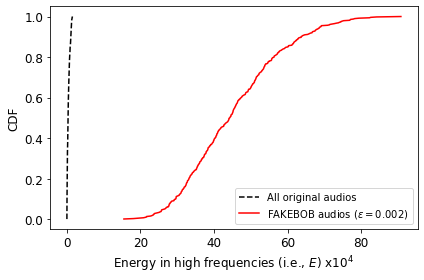

In [4]:
iv_adv_epsilon_002_detections = [0.0015502158, 0.0018088191, 0.0019574433, 0.0020837311, 0.002134097, 0.0021661324, 0.002168528, 0.002267185, 0.0023093976, 0.0023266757, 0.0023558289, 0.0023578948, 0.0023704858, 0.0023746819, 0.0024192235, 0.002473902, 0.0025101209, 0.0025289075, 0.0025612842, 0.0025643755, 0.0025697222, 0.0025717686, 0.0025773558, 0.0026181347, 0.002654484, 0.002678174, 0.0026909064, 0.0026965812, 0.0027037808, 0.0027521965, 0.0027525213, 0.0027717033, 0.0027734726, 0.0027779953, 0.002779906, 0.0027804151, 0.0027834754, 0.0028030206, 0.0028038898, 0.0028093213, 0.0028203502, 0.0028362165, 0.0028381606, 0.0028536867, 0.0029073087, 0.0029145074, 0.0029149048, 0.002926177, 0.0029555473, 0.0029641986, 0.0029649963, 0.0029690096, 0.002969275, 0.0029693812, 0.002972537, 0.0029980747, 0.00302786, 0.0030522065, 0.0030541983, 0.0030649325, 0.0030703864, 0.003088215, 0.003098853, 0.0031009386, 0.0031057072, 0.0031102437, 0.0031128998, 0.003127585, 0.0031322925, 0.003134384, 0.0031371408, 0.0031490845, 0.0031657442, 0.0031663696, 0.0031792866, 0.0031852592, 0.0031862578, 0.0031930378, 0.0032190867, 0.0032230571, 0.0032240306, 0.0032353986, 0.003239438, 0.0032415085, 0.003243019, 0.0032499533, 0.003252271, 0.0032544914, 0.0032669697, 0.003274489, 0.003277061, 0.0032771411, 0.0032792024, 0.0032923496, 0.0033061302, 0.0033105768, 0.0033166949, 0.0033187533, 0.0033195014, 0.0033276838, 0.0033416215, 0.003341741, 0.0033483715, 0.003349856, 0.0033554235, 0.0033692971, 0.0033769966, 0.003379188, 0.0034005377, 0.0034028045, 0.003408495, 0.0034106192, 0.0034241795, 0.0034445624, 0.003446122, 0.0034546277, 0.0034691424, 0.0034766456, 0.003498151, 0.0035202822, 0.0035206296, 0.0035226792, 0.0035297, 0.0035325508, 0.0035398821, 0.0035420565, 0.003546469, 0.00355016, 0.0035644548, 0.0035650854, 0.0035701946, 0.0035751732, 0.0035899421, 0.003592398, 0.0036053672, 0.0036088242, 0.003610025, 0.0036109092, 0.003625658, 0.0036375886, 0.0036499768, 0.003651987, 0.0036588414, 0.0036591927, 0.0036599438, 0.0036832173, 0.0036864525, 0.003688864, 0.0037166763, 0.003716714, 0.0037269488, 0.0037275385, 0.0037334745, 0.0037374916, 0.0037401614, 0.0037406269, 0.0037517752, 0.0037727698, 0.0037782793, 0.0037800856, 0.0037856353, 0.0037859904, 0.0037873515, 0.0038008592, 0.0038072118, 0.0038212987, 0.0038266545, 0.003830269, 0.0038342236, 0.0038344567, 0.0038392544, 0.0038400246, 0.0038463722, 0.0038652497, 0.0038770046, 0.0038786437, 0.0038839134, 0.00390509, 0.0039058437, 0.003908223, 0.0039377282, 0.0039427932, 0.003946973, 0.0039561484, 0.0039728098, 0.0039751423, 0.003982488, 0.003985595, 0.0039861402, 0.0039965413, 0.0039969063, 0.0039991937, 0.004007103, 0.00401201, 0.004017255, 0.0040357057, 0.0040387018, 0.0040504034, 0.004050561, 0.004052479, 0.00405825, 0.0040689833, 0.0040721833, 0.004074551, 0.004077897, 0.0040789233, 0.004093474, 0.004096704, 0.004100571, 0.004102356, 0.0041066194, 0.0041161547, 0.0041184938, 0.004134912, 0.0041349265, 0.0041462216, 0.004156215, 0.004171785, 0.004182909, 0.00418487, 0.004192455, 0.004207352, 0.0042327135, 0.004261185, 0.004261706, 0.004270224, 0.0042725164, 0.004273359, 0.004293586, 0.00430095, 0.0043096403, 0.004326607, 0.0043460582, 0.0043642838, 0.0043723905, 0.0043791393, 0.0043882835, 0.0043914397, 0.0044014086, 0.004403262, 0.0044042403, 0.004404398, 0.004406174, 0.0044223447, 0.0044319383, 0.0044357157, 0.004445753, 0.0044585676, 0.004458903, 0.0044597867, 0.0044601983, 0.0044729286, 0.004491208, 0.0044930647, 0.0044999756, 0.004501715, 0.004509421, 0.0045094783, 0.0045163394, 0.0045174016, 0.004519624, 0.004521293, 0.004526737, 0.004533505, 0.0045377277, 0.0045453752, 0.004548916, 0.004560814, 0.0045634685, 0.0045717834, 0.004575004, 0.0045767417, 0.0045894515, 0.0045909993, 0.0045941807, 0.0046040965, 0.0046061096, 0.004612318, 0.004620866, 0.0046317694, 0.0046334914, 0.004637939, 0.004641427, 0.0046475907, 0.004650172, 0.0046542245, 0.0046768333, 0.004677772, 0.004690484, 0.0047115716, 0.0047120405, 0.0047256667, 0.00474103, 0.004750675, 0.00475977, 0.004760617, 0.0047778236, 0.004795659, 0.0048078443, 0.004839217, 0.0048506297, 0.0048536006, 0.0048540416, 0.0048607294, 0.004867673, 0.0048818085, 0.0049186833, 0.004921408, 0.004923177, 0.0049270103, 0.0049317577, 0.004939874, 0.0049401983, 0.004980447, 0.0049872613, 0.0049939808, 0.0049975114, 0.0050071003, 0.005007154, 0.005014416, 0.0050228024, 0.0050304946, 0.005036189, 0.0050404705, 0.005049079, 0.005050339, 0.0050712726, 0.005078214, 0.0050920616, 0.0050977077, 0.005098077, 0.0050990465, 0.0051070065, 0.0051083686, 0.0051199924, 0.0051236465, 0.0051317425, 0.0051358766, 0.0051395004, 0.005141167, 0.00515144, 0.0051520383, 0.0051541245, 0.0051723095, 0.0051787263, 0.005186633, 0.005198373, 0.0052172686, 0.005221911, 0.0052232277, 0.0052232277, 0.00523779, 0.0052495054, 0.005260474, 0.005283195, 0.0052935653, 0.0052993256, 0.005301851, 0.0053175283, 0.005323196, 0.0053347275, 0.0053441366, 0.00534787, 0.005350153, 0.0053569125, 0.0053587565, 0.005363748, 0.0053759348, 0.0053772596, 0.0053810617, 0.005381531, 0.005394391, 0.005400933, 0.0054033133, 0.005448909, 0.0054611033, 0.005465344, 0.0054653743, 0.0054747784, 0.0055003637, 0.0055007376, 0.0055507277, 0.0055584544, 0.005567149, 0.0055676047, 0.0055679395, 0.0055763605, 0.00558115, 0.005592142, 0.005629237, 0.0056313397, 0.005633302, 0.005637097, 0.0056571546, 0.0056779934, 0.0056910394, 0.0057111564, 0.005719788, 0.00572352, 0.0057270676, 0.005747388, 0.005748914, 0.005771853, 0.005773245, 0.005783554, 0.005803338, 0.0058321096, 0.0058435895, 0.0058632884, 0.005879175, 0.0059150583, 0.005925888, 0.0059362114, 0.0059540938, 0.006009496, 0.0060196277, 0.0060209273, 0.006027295, 0.0061169914, 0.0061210166, 0.006127477, 0.0061486457, 0.0061487607, 0.006162778, 0.0061687436, 0.0061706, 0.006183747, 0.0062001157, 0.0062142294, 0.0062332717, 0.00623336, 0.00625036, 0.0062731314, 0.0062731425, 0.0062913853, 0.006296863, 0.006311751, 0.006368516, 0.006372049, 0.006373414, 0.0063977027, 0.0064081135, 0.0064364173, 0.0064642364, 0.0065484145, 0.0065699816, 0.0065983343, 0.006616103, 0.0066649467, 0.0066701053, 0.006673643, 0.0066942223, 0.0067409845, 0.0067529255, 0.006756075, 0.006773769, 0.006784858, 0.0068215425, 0.00683044, 0.0068583707, 0.006859811, 0.0068642055, 0.0068934956, 0.006909678, 0.006911803, 0.006919904, 0.0070875864, 0.0071381745, 0.0071497606, 0.007216985, 0.007276121, 0.007325063, 0.007387991, 0.0074052, 0.0074493852, 0.007452594, 0.007485436, 0.007523219, 0.007691152, 0.00770188, 0.0077094934, 0.0077916314, 0.007821372, 0.007936365, 0.00822895, 0.008258714, 0.0084218355, 0.009081075]

plot_cdf_iv_adv_audio(all_ori_detections, 
                      iv_adv_epsilon_002_detections,
                      './figs/detection_iv_adv_audios.png')